# Kunskapskontroll 3

In [10]:
# importing 3rd party libraries

import pandas as pd
import matplotlib.pyplot as plt

In [25]:
data_file = 'housing.csv'
try:
    housing_data = pd.read_csv(data_file)
    print('Data loaded.')
except FileNotFoundError:
    print(f'{data_file} not found!')
except Exception as ex:
    print(f'Error during file load - {ex}')

Data loaded.


In [6]:
housing_data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


Some EDA work below

We check what areas do have the highest mean value of house prices. Sorting on the most expensive areas.

In [14]:
housing_data.groupby('ocean_proximity')['median_house_value'].mean().sort_values(ascending=False)

ocean_proximity
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
<1H OCEAN     240084.285464
INLAND        124805.392001
Name: median_house_value, dtype: float64

In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


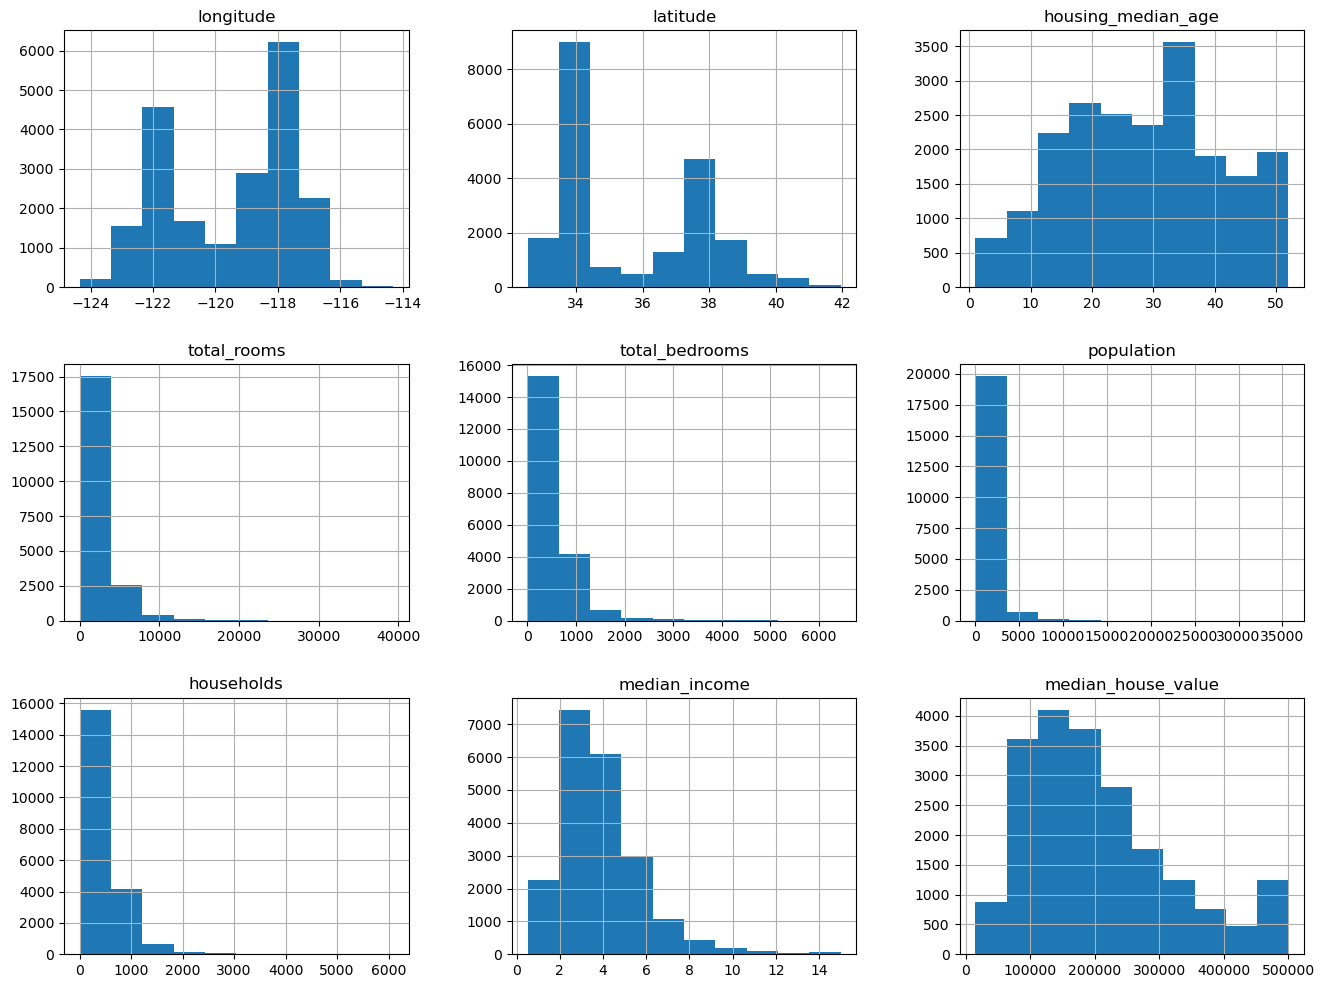

In [39]:
# Creating histograms for each column
housing_data.hist(figsize=(16, 12))
plt.show()

Text(0, 0.5, 'Median House Value')

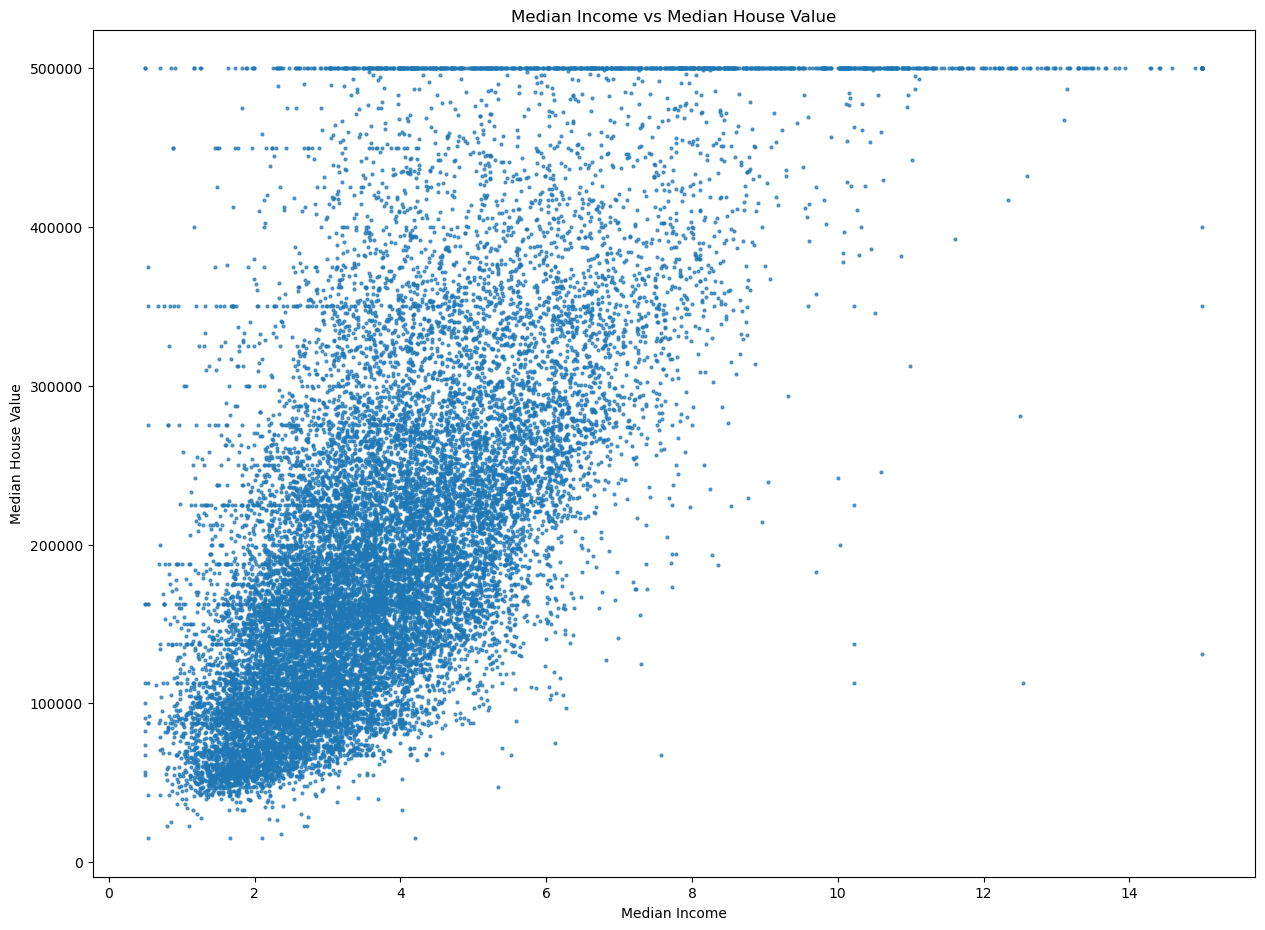

In [49]:
# show that higher income tend to result in higher house value

fig, ax = plt.subplots(figsize=(15, 11))

x = housing_data['median_income']
y = housing_data['median_house_value']
ax.scatter(x, y, alpha=0.7, s=4)

ax.set_title('Median Income vs Median House Value')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')


Here we train the model to show the regression line which clearly show that high income and high house value are related. 
We could also use this model to predict house price or income.

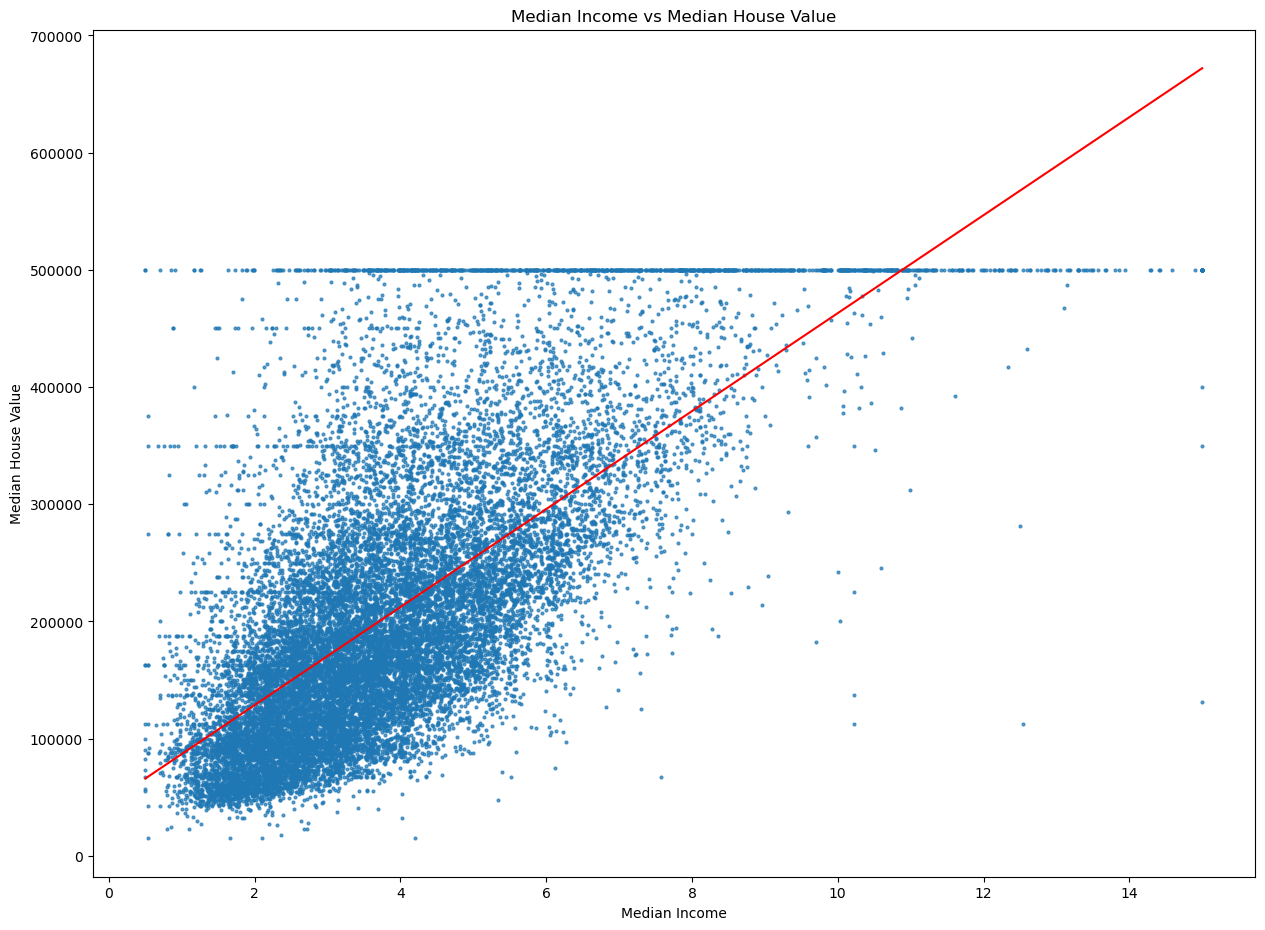

In [64]:
from sklearn.linear_model import LinearRegression
import numpy as np

xx = x.reshape(-1, 1)

reg = LinearRegression()
reg.fit(xx, y)

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) 
y_pred = reg.predict(x_range) 

fig, ax = plt.subplots(figsize =(15, 11))

ax.scatter(x, y, alpha=0.7, s=4)

ax.set_title('Median Income vs Median House Value')
ax.set_xlabel('Median Income')
ax.set_ylabel('Median House Value')

ax.plot(x_range, y_pred, color='red', label="Regression Line")


1. Framför allt en utmaning i uppgift 3 om på vilken nivå svaret ska vara.
2. Betyg G. Kanske hade kunnat utforska fler samband och plottat med fler inställningar.
3. Ser fram emot nästa delkurs!